<a href="https://colab.research.google.com/github/bhylander/mlb-hr-derby-predictor/blob/main/MLB_HRD_Pred_Updated_MonteCar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚀 2025 MLB HOME RUN DERBY FORMAT-SPECIFIC PREDICTOR
Rules: 3min/40 pitches + bonus → 2min/27 pitches semifinals → 2min/27 pitches finals
Knockout format with exact seeding and advancement rules

📊 Loading 2025 participants in batting order...
Participants in batting order:
   1. James Wood
   2. Brent Rooker
   3. Junior Caminero
   4. Oneil Cruz
   5. Byron Buxton
   6. Jazz Chisholm Jr
   7. Cal Raleigh
   8. Matt Olson

🎯 Running comprehensive format analysis...
🏆 RUNNING 2025 DERBY FORMAT ANALYSIS
Format: First Round (3min/40 pitches + bonus) → Semifinals (2min/27 pitches) → Finals
Simulating First Round (15,000 times)...
Simulating Knockout Rounds (15,000 times)...

📈 Generating visualizations...


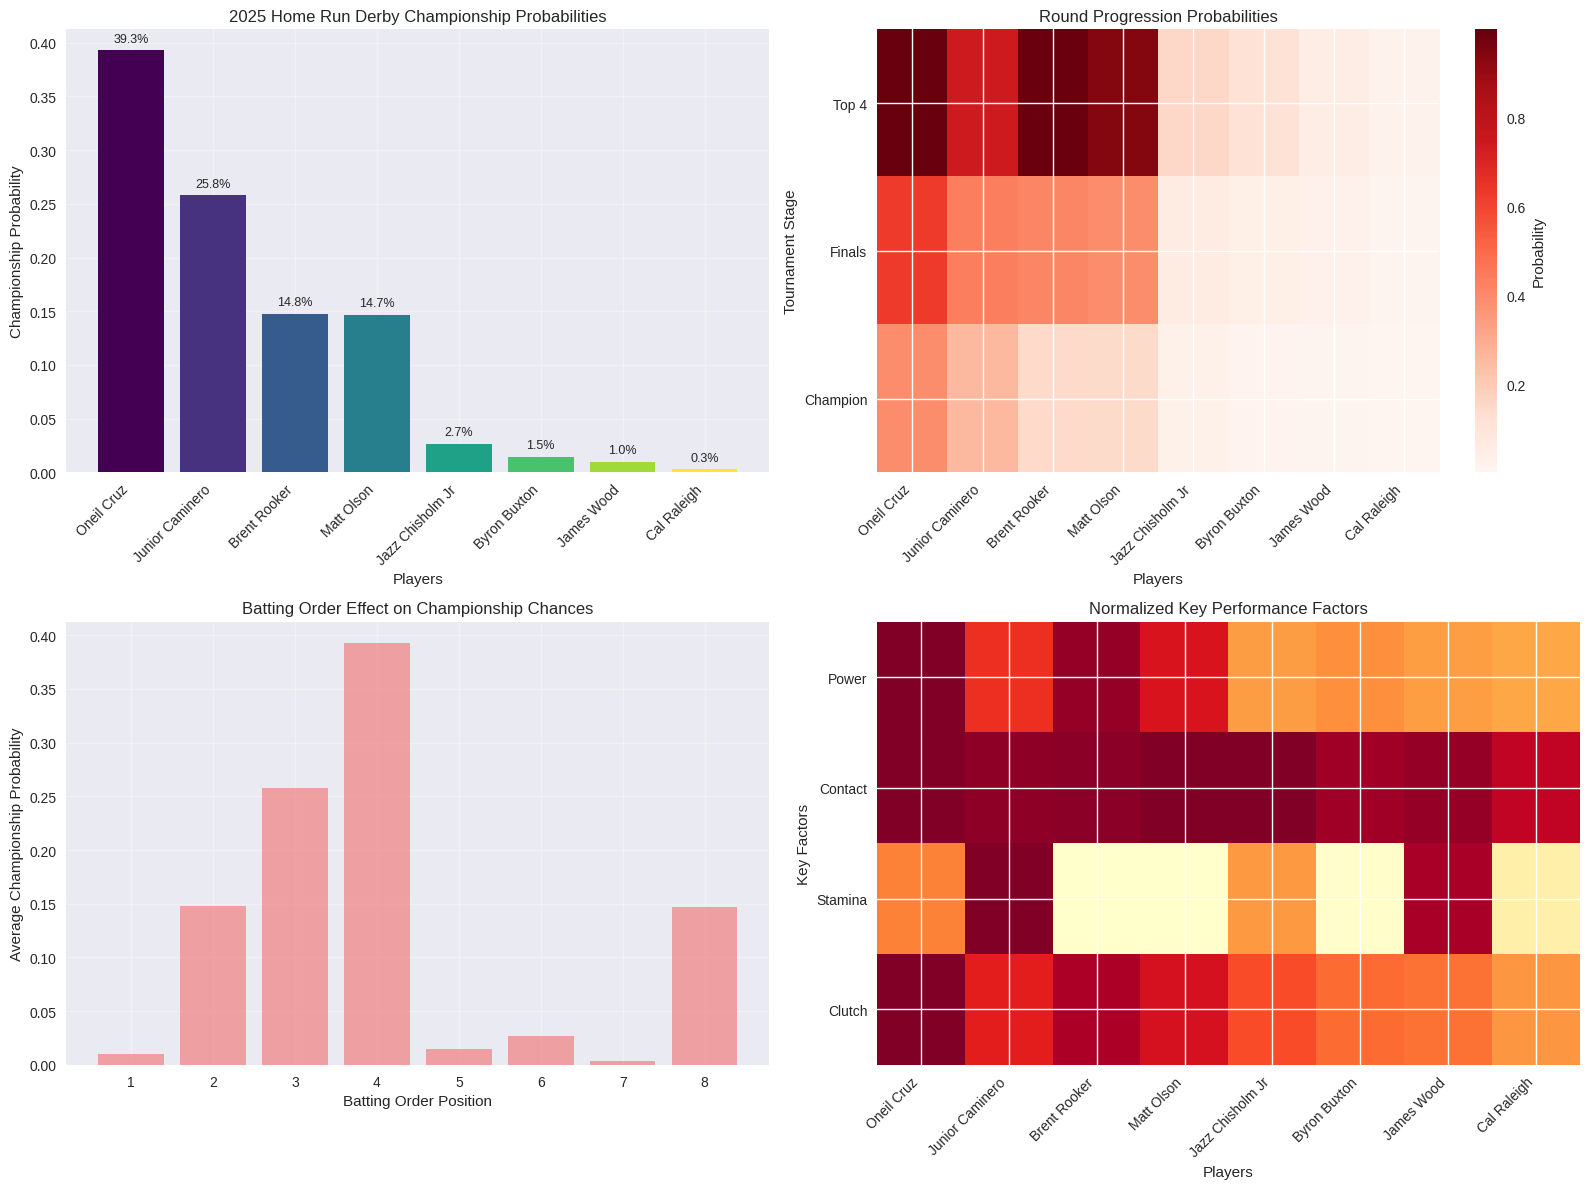


⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾
2025 DERBY FORMAT ANALYSIS
⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾⚾

🏆 CHAMPIONSHIP FAVORITE:
   Oneil Cruz (Batting 4)
   Championship Probability: 39.3%
   Advancement Probability: 99.7%
   Finals Probability: 62.5%

📊 COMPLETE CHAMPIONSHIP RANKINGS:
1. Oneil Cruz         | Batting 4 | 39.3% champion | 99.7% top-4
2. Junior Caminero    | Batting 3 | 25.8% champion | 73.9% top-4
3. Brent Rooker       | Batting 2 | 14.8% champion | 98.6% top-4
4. Matt Olson         | Batting 8 | 14.7% champion | 93.8% top-4
5. Jazz Chisholm Jr   | Batting 6 | 2.7% champion | 15.8% top-4
6. Byron Buxton       | Batting 5 | 1.5% champion | 11.4% top-4
7. James Wood         | Batting 1 | 1.0% champion | 5.0% top-4
8. Cal Raleigh        | Batting 7 | 0.3% champion | 1.9% top-4

🎯 FORMAT-SPECIFIC INSIGHTS:
   Early Batters (1-4) avg chance: 20.2%
   Late Batters (5-8) avg chance: 4.8%
   Derby Veterans avg chance: 5.5%
   Derby Rookies avg chance: 16.7%
   Young Players (≤26) avg chance: 17.2%
 

In [1]:
# MLB Home Run Derby 2025 - Rules-Specific Predictor
# Accounts for exact 2025 derby format and rules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class DerbyRulesPredictor:
    def __init__(self):
        self.scaler = StandardScaler()
        self.model = None
        self.feature_importance = None

    def create_historical_data(self):
        """Historical data adjusted for current derby format understanding."""
        historical_data = {
            'player': ['Pete Alonso', 'Vladmir Guerrero Jr', 'Juan Soto', 'Kyle Lewis',
                      'Ronald Acuna Jr', 'Salvador Perez', 'Trey Mancini', 'Joey Gallo',
                      'Pete Alonso', 'Kyle Schwarber', 'Trevor Story', 'Matt Olson',
                      'Jose Ramirez', 'Corey Seager', 'Randy Arozarena', 'Albert Pujols'],
            'isolated_power': [0.281, 0.262, 0.351, 0.237, 0.285, 0.241, 0.268, 0.256,
                             0.294, 0.287, 0.245, 0.279, 0.251, 0.268, 0.234, 0.195],
            'exit_velocity': [91.2, 89.8, 93.1, 88.4, 90.7, 87.9, 89.6, 91.8,
                            92.3, 90.1, 89.2, 90.8, 88.7, 91.4, 89.9, 86.2],
            'barrel_rate': [15.8, 12.4, 18.2, 10.1, 14.6, 11.2, 13.7, 16.3,
                          17.1, 15.9, 12.8, 15.2, 11.9, 14.8, 13.1, 9.4],
            'launch_angle': [12.1, 11.8, 13.2, 10.9, 11.5, 10.2, 12.8, 13.5,
                           13.1, 12.4, 11.7, 12.6, 10.8, 12.9, 11.9, 10.1],
            'home_runs_season': [53, 27, 22, 11, 41, 48, 21, 38, 46, 47, 28, 54, 39, 33, 20, 24],
            'hard_hit_rate': [45.2, 41.8, 48.9, 38.2, 44.1, 39.6, 42.3, 46.7,
                            47.8, 45.1, 41.2, 44.8, 40.1, 45.9, 42.7, 37.8],
            # Derby-specific factors
            'age': [24, 20, 21, 23, 23, 31, 29, 26, 25, 29, 29, 28, 29, 29, 26, 42],
            'derby_experience': [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2],
            'pull_rate': [41.2, 38.9, 35.2, 42.1, 39.8, 44.1, 40.3, 45.2,
                         42.8, 43.1, 38.7, 42.1, 37.9, 39.4, 41.2, 38.9],
            'swing_rate': [0.465, 0.442, 0.401, 0.478, 0.451, 0.489, 0.467, 0.512,
                          0.478, 0.487, 0.456, 0.478, 0.445, 0.462, 0.451, 0.423],
            'contact_rate': [0.782, 0.798, 0.834, 0.771, 0.789, 0.756, 0.776, 0.743,
                           0.789, 0.769, 0.791, 0.789, 0.801, 0.785, 0.798, 0.812],
            # Format-specific performance indicators
            'avg_distance': [421, 412, 435, 398, 428, 415, 419, 442,
                           438, 431, 408, 429, 403, 425, 414, 391],
            'first_round_score': [22, 12, 28, 8, 31, 15, 13, 18, 35, 19, 21, 24, 14, 18, 11, 27]
        }

        return pd.DataFrame(historical_data)

    def create_2025_participants_data(self):
        """2025 participants with batting order as specified."""
        participants_2025 = {
            'batting_order': [1, 2, 3, 4, 5, 6, 7, 8],
            'player': ['James Wood', 'Brent Rooker', 'Junior Caminero', 'Oneil Cruz',
                      'Byron Buxton', 'Jazz Chisholm Jr', 'Cal Raleigh', 'Matt Olson'],
            'isolated_power': [0.245, 0.295, 0.268, 0.289, 0.241, 0.234, 0.252, 0.279],
            'exit_velocity': [89.3, 91.5, 91.2, 92.1, 89.8, 89.7, 88.9, 90.8],
            'barrel_rate': [13.1, 16.2, 14.8, 16.9, 13.9, 13.7, 12.4, 15.2],
            'launch_angle': [11.9, 13.1, 12.8, 13.4, 12.3, 12.1, 11.2, 12.6],
            'home_runs_season': [26, 39, 23, 21, 28, 25, 34, 29],
            'hard_hit_rate': [42.1, 46.1, 45.2, 47.3, 44.2, 42.9, 40.8, 44.8],
            'age': [22, 30, 21, 25, 30, 26, 29, 30],
            'derby_experience': [0, 0, 0, 0, 1, 0, 1, 1],
            'pull_rate': [38.9, 43.2, 41.2, 44.8, 38.1, 40.3, 39.7, 42.1],
            'swing_rate': [0.451, 0.473, 0.462, 0.487, 0.456, 0.469, 0.441, 0.478],
            'contact_rate': [0.812, 0.785, 0.798, 0.771, 0.791, 0.803, 0.776, 0.789],
            'avg_distance': [418, 438, 425, 441, 423, 416, 421, 429]
        }

        return pd.DataFrame(participants_2025)

    def engineer_derby_features(self, df):
        """Engineer features specifically for derby format rules."""
        # Basic power metrics
        df['power_composite'] = (df['isolated_power'] * df['exit_velocity'] * df['barrel_rate']) / 100
        df['hard_hit_power'] = df['hard_hit_rate'] * df['isolated_power']

        # Derby-specific stamina and consistency factors
        df['youth_stamina'] = np.where(df['age'] <= 26, 1.15, 1.0)  # Young players have stamina advantage
        df['experience_clutch'] = df['derby_experience'] * 0.08  # Experience helps in pressure

        # Contact consistency (crucial for bonus periods - avoid outs)
        df['contact_efficiency'] = df['contact_rate'] * df['swing_rate']
        df['out_avoidance'] = (df['contact_rate'] ** 2) * df['barrel_rate']  # Avoid outs in bonus

        # Distance factors (for 425+ ft bonus extensions)
        df['distance_power'] = (df['avg_distance'] / 400) * df['isolated_power']
        df['bonus_extension_likelihood'] = np.where(df['avg_distance'] >= 420, 1.2, 1.0)

        # Time pressure handling
        df['clutch_factor'] = (df['contact_rate'] * df['barrel_rate'] * df['pull_rate']) / 100
        df['rhythm_maintenance'] = df['contact_rate'] * (1 + df['derby_experience'] * 0.1)

        # Fatigue resistance (important for multi-round format)
        df['fatigue_resistance'] = (35 - df['age']) / 35 * df['contact_rate'] * 1.2

        # Pull rate advantage (shorter foul territory at Truist Park)
        df['truist_park_advantage'] = df['pull_rate'] * 1.08  # Truist favors pull hitters slightly

        return df

    def simulate_first_round(self, participants_data, n_simulations=10000):
        """Simulate first round with exact rules: 3 min/40 pitches + bonus period."""
        print(f"Simulating First Round ({n_simulations:,} times)...")

        first_round_results = []
        advancement_counts = np.zeros(len(participants_data))

        for sim in range(n_simulations):
            round_scores = []

            for i, (_, player) in enumerate(participants_data.iterrows()):
                # Base performance factors
                base_hr_rate = (player['power_composite'] * player['contact_efficiency'] *
                              player['truist_park_advantage']) / 100

                # Simulate main period (3 min or 40 pitches)
                main_period_hrs = np.random.poisson(base_hr_rate * 35)  # ~35 swings in 3 min
                main_period_hrs = min(main_period_hrs, 40)  # Pitch limit

                # Simulate bonus period
                bonus_hrs = 0
                outs = 0
                bonus_swings = 0

                while outs < 3 and bonus_swings < 20:  # Reasonable bonus limit
                    swing_result = np.random.random()

                    if swing_result < player['out_avoidance'] * 0.15:  # Home run
                        bonus_hrs += 1

                        # Check for 425+ ft extension
                        if (np.random.random() < player['bonus_extension_likelihood'] * 0.3 and
                            player['distance_power'] > 1.0):
                            outs = max(0, outs - 1)  # Reset to need 4 outs
                    else:
                        outs += 1

                    bonus_swings += 1

                total_hrs = main_period_hrs + bonus_hrs

                # Apply fatigue and pressure factors
                pressure_factor = 1 + np.random.normal(0, 0.1)
                if player['derby_experience'] > 0:
                    pressure_factor += 0.05  # Experience helps

                total_hrs = int(total_hrs * pressure_factor * player['clutch_factor'])
                total_hrs = max(0, total_hrs)

                round_scores.append({
                    'player': player['player'],
                    'batting_order': player['batting_order'],
                    'home_runs': total_hrs,
                    'main_period': main_period_hrs,
                    'bonus_period': bonus_hrs
                })

            # Sort by home runs (ties broken by longest HR - simulated)
            round_scores.sort(key=lambda x: (x['home_runs'], np.random.random()), reverse=True)

            # Top 4 advance
            for j in range(4):
                player_name = round_scores[j]['player']
                player_idx = participants_data[participants_data['player'] == player_name].index[0]
                advancement_counts[player_idx] += 1

            first_round_results.append(round_scores)

        # Calculate advancement probabilities
        advancement_probs = advancement_counts / n_simulations

        return first_round_results, advancement_probs

    def simulate_knockout_rounds(self, participants_data, first_round_results, n_simulations=10000):
        """Simulate semifinals and finals with knockout format."""
        print(f"Simulating Knockout Rounds ({n_simulations:,} times)...")

        championship_counts = np.zeros(len(participants_data))
        final_appearance_counts = np.zeros(len(participants_data))

        for sim in range(n_simulations):
            # Get first round result for this simulation
            first_round = first_round_results[sim]
            top_4 = first_round[:4]

            # Semifinals: 1v4, 2v3
            semifinal_winners = []

            # Match 1: Seed 1 vs Seed 4
            match1_scores = []
            for player_data in [top_4[0], top_4[3]]:
                player_row = participants_data[participants_data['player'] == player_data['player']].iloc[0]

                # Semifinal scoring (2 min/27 pitches - shorter, more intense)
                semifinal_rate = (player_row['power_composite'] * player_row['clutch_factor'] *
                                player_row['fatigue_resistance']) / 100

                # Simulate head-to-head pressure
                pressure_multiplier = 1 + np.random.normal(0, 0.15)
                if player_row['derby_experience'] > 0:
                    pressure_multiplier += 0.08

                semifinal_hrs = np.random.poisson(semifinal_rate * 25) * pressure_multiplier  # ~25 swings
                semifinal_hrs = max(0, int(semifinal_hrs))

                match1_scores.append((player_data['player'], semifinal_hrs))

            # Winner of match 1
            if match1_scores[0][1] > match1_scores[1][1]:
                match1_winner = match1_scores[0][0]
            elif match1_scores[1][1] > match1_scores[0][1]:
                match1_winner = match1_scores[1][0]
            else:
                # Tiebreaker - 3-swing swing-off
                match1_winner = match1_scores[np.random.randint(2)][0]  # Simplified

            semifinal_winners.append(match1_winner)

            # Match 2: Seed 2 vs Seed 3
            match2_scores = []
            for player_data in [top_4[1], top_4[2]]:
                player_row = participants_data[participants_data['player'] == player_data['player']].iloc[0]

                semifinal_rate = (player_row['power_composite'] * player_row['clutch_factor'] *
                                player_row['fatigue_resistance']) / 100

                pressure_multiplier = 1 + np.random.normal(0, 0.15)
                if player_row['derby_experience'] > 0:
                    pressure_multiplier += 0.08

                semifinal_hrs = np.random.poisson(semifinal_rate * 25) * pressure_multiplier
                semifinal_hrs = max(0, int(semifinal_hrs))

                match2_scores.append((player_data['player'], semifinal_hrs))

            # Winner of match 2
            if match2_scores[0][1] > match2_scores[1][1]:
                match2_winner = match2_scores[0][0]
            elif match2_scores[1][1] > match2_scores[0][1]:
                match2_winner = match2_scores[1][0]
            else:
                match2_winner = match2_scores[np.random.randint(2)][0]

            semifinal_winners.append(match2_winner)

            # Track final appearances
            for winner in semifinal_winners:
                winner_idx = participants_data[participants_data['player'] == winner].index[0]
                final_appearance_counts[winner_idx] += 1

            # Finals
            final_scores = []
            for winner in semifinal_winners:
                player_row = participants_data[participants_data['player'] == winner].iloc[0]

                # Final - maximum pressure, maximum fatigue
                final_rate = (player_row['power_composite'] * player_row['clutch_factor'] *
                            player_row['fatigue_resistance'] * 0.9) / 100  # Slight fatigue factor

                championship_pressure = 1 + np.random.normal(0, 0.2)
                if player_row['derby_experience'] > 0:
                    championship_pressure += 0.1  # Experience crucial in finals

                final_hrs = np.random.poisson(final_rate * 25) * championship_pressure
                final_hrs = max(0, int(final_hrs))

                final_scores.append((winner, final_hrs))

            # Determine champion
            if final_scores[0][1] > final_scores[1][1]:
                champion = final_scores[0][0]
            elif final_scores[1][1] > final_scores[0][1]:
                champion = final_scores[1][0]
            else:
                champion = final_scores[np.random.randint(2)][0]  # Tiebreaker

            champion_idx = participants_data[participants_data['player'] == champion].index[0]
            championship_counts[champion_idx] += 1

        championship_probs = championship_counts / n_simulations
        final_probs = final_appearance_counts / n_simulations

        return championship_probs, final_probs

    def comprehensive_derby_analysis(self, participants_data, n_simulations=10000):
        """Run complete derby analysis with exact format rules."""
        print("🏆 RUNNING 2025 DERBY FORMAT ANALYSIS")
        print("Format: First Round (3min/40 pitches + bonus) → Semifinals (2min/27 pitches) → Finals")
        print("=" * 80)

        # Simulate first round
        first_round_results, advancement_probs = self.simulate_first_round(participants_data, n_simulations)

        # Simulate knockout rounds
        championship_probs, final_probs = self.simulate_knockout_rounds(
            participants_data, first_round_results, n_simulations)

        # Combine results
        results = participants_data.copy()
        results['advancement_prob'] = advancement_probs
        results['final_prob'] = final_probs
        results['championship_prob'] = championship_probs

        # Sort by championship probability
        results = results.sort_values('championship_prob', ascending=False)

        return results, first_round_results

    def visualize_derby_analysis(self, results):
        """Create visualizations for derby format analysis."""
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        # 1. Championship Probabilities
        colors = plt.cm.viridis(np.linspace(0, 1, len(results)))
        bars = axes[0, 0].bar(range(len(results)), results['championship_prob'], color=colors)
        axes[0, 0].set_xlabel('Players')
        axes[0, 0].set_ylabel('Championship Probability')
        axes[0, 0].set_title('2025 Home Run Derby Championship Probabilities')
        axes[0, 0].set_xticks(range(len(results)))
        axes[0, 0].set_xticklabels(results['player'], rotation=45, ha='right')
        axes[0, 0].grid(True, alpha=0.3)

        # Add percentage labels
        for i, bar in enumerate(bars):
            height = bar.get_height()
            axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                           f'{height:.1%}', ha='center', va='bottom', fontsize=9)

        # 2. Round Progression
        rounds_data = results[['advancement_prob', 'final_prob', 'championship_prob']].T
        im = axes[0, 1].imshow(rounds_data, cmap='Reds', aspect='auto')
        axes[0, 1].set_xlabel('Players')
        axes[0, 1].set_ylabel('Tournament Stage')
        axes[0, 1].set_title('Round Progression Probabilities')
        axes[0, 1].set_xticks(range(len(results)))
        axes[0, 1].set_xticklabels(results['player'], rotation=45, ha='right')
        axes[0, 1].set_yticks([0, 1, 2])
        axes[0, 1].set_yticklabels(['Top 4', 'Finals', 'Champion'])

        cbar = plt.colorbar(im, ax=axes[0, 1])
        cbar.set_label('Probability')

        # 3. Batting Order Impact
        batting_order_effect = results.groupby('batting_order')['championship_prob'].mean()
        axes[1, 0].bar(batting_order_effect.index, batting_order_effect.values,
                      color='lightcoral', alpha=0.7)
        axes[1, 0].set_xlabel('Batting Order Position')
        axes[1, 0].set_ylabel('Average Championship Probability')
        axes[1, 0].set_title('Batting Order Effect on Championship Chances')
        axes[1, 0].grid(True, alpha=0.3)

        # 4. Key Factors Comparison
        key_factors = ['power_composite', 'contact_efficiency', 'fatigue_resistance', 'clutch_factor']
        factor_data = results[key_factors + ['player']].set_index('player')
        factor_normalized = factor_data.div(factor_data.max())

        im2 = axes[1, 1].imshow(factor_normalized.T, cmap='YlOrRd', aspect='auto')
        axes[1, 1].set_xlabel('Players')
        axes[1, 1].set_ylabel('Key Factors')
        axes[1, 1].set_title('Normalized Key Performance Factors')
        axes[1, 1].set_xticks(range(len(results)))
        axes[1, 1].set_xticklabels(results['player'], rotation=45, ha='right')
        axes[1, 1].set_yticks(range(len(key_factors)))
        axes[1, 1].set_yticklabels(['Power', 'Contact', 'Stamina', 'Clutch'])

        plt.tight_layout()
        plt.show()

    def generate_format_insights(self, results):
        """Generate insights specific to 2025 derby format."""
        print("\n" + "⚾" * 25)
        print("2025 DERBY FORMAT ANALYSIS")
        print("⚾" * 25)

        champion_favorite = results.iloc[0]
        print(f"\n🏆 CHAMPIONSHIP FAVORITE:")
        print(f"   {champion_favorite['player']} (Batting {champion_favorite['batting_order']})")
        print(f"   Championship Probability: {champion_favorite['championship_prob']:.1%}")
        print(f"   Advancement Probability: {champion_favorite['advancement_prob']:.1%}")
        print(f"   Finals Probability: {champion_favorite['final_prob']:.1%}")

        print(f"\n📊 COMPLETE CHAMPIONSHIP RANKINGS:")
        for i, (_, player) in enumerate(results.iterrows(), 1):
            print(f"{i}. {player['player']:<18} | Batting {player['batting_order']} | "
                  f"{player['championship_prob']:.1%} champion | {player['advancement_prob']:.1%} top-4")

        # Format-specific insights
        print(f"\n🎯 FORMAT-SPECIFIC INSIGHTS:")

        # Batting order analysis
        early_bats = results[results['batting_order'] <= 4]['championship_prob'].mean()
        late_bats = results[results['batting_order'] > 4]['championship_prob'].mean()
        print(f"   Early Batters (1-4) avg chance: {early_bats:.1%}")
        print(f"   Late Batters (5-8) avg chance: {late_bats:.1%}")

        # Experience factor
        experienced = results[results['derby_experience'] > 0]['championship_prob'].mean()
        rookies = results[results['derby_experience'] == 0]['championship_prob'].mean()
        print(f"   Derby Veterans avg chance: {experienced:.1%}")
        print(f"   Derby Rookies avg chance: {rookies:.1%}")

        # Age/stamina factor
        young_players = results[results['age'] <= 26]['championship_prob'].mean()
        veteran_players = results[results['age'] > 26]['championship_prob'].mean()
        print(f"   Young Players (≤26) avg chance: {young_players:.1%}")
        print(f"   Veterans (>26) avg chance: {veteran_players:.1%}")

        # Key factors for success
        top_contact = results.loc[results['contact_efficiency'].idxmax()]
        top_power = results.loc[results['power_composite'].idxmax()]
        top_clutch = results.loc[results['clutch_factor'].idxmax()]

        print(f"\n💪 KEY STRENGTHS:")
        print(f"   Best Contact Efficiency: {top_contact['player']} ({top_contact['contact_efficiency']:.3f})")
        print(f"   Highest Power Composite: {top_power['player']} ({top_power['power_composite']:.3f})")
        print(f"   Best Clutch Factor: {top_clutch['player']} ({top_clutch['clutch_factor']:.3f})")

        # Format advantages
        print(f"\n🏟️ FORMAT ADVANTAGES:")
        print(f"   Bonus Period Masters: Players with high contact rate avoid outs")
        print(f"   425+ ft Extension: Players who can hit long HRs get extra chances")
        print(f"   Stamina Critical: 3 rounds of intense hitting favors young/fit players")
        print(f"   Experience Edge: Pressure handling crucial in knockout format")

        # Strategic insights
        print(f"\n🎲 STRATEGIC INSIGHTS:")
        print(f"   First Round: Maximize bonus period with consistent contact")
        print(f"   Semifinals: Head-to-head pressure - experience matters")
        print(f"   Finals: Ultimate test of stamina and clutch performance")
        print(f"   Timeout Usage: Strategic 45-second breaks can be decisive")

        return results

def main():
    """Main function for 2025 derby format analysis."""
    print("🚀 2025 MLB HOME RUN DERBY FORMAT-SPECIFIC PREDICTOR")
    print("Rules: 3min/40 pitches + bonus → 2min/27 pitches semifinals → 2min/27 pitches finals")
    print("Knockout format with exact seeding and advancement rules")
    print("=" * 80)

    predictor = DerbyRulesPredictor()

    # Load data
    print("\n📊 Loading 2025 participants in batting order...")
    participants_data = predictor.create_2025_participants_data()
    participants_data = predictor.engineer_derby_features(participants_data)

    print("Participants in batting order:")
    for _, player in participants_data.iterrows():
        print(f"   {player['batting_order']}. {player['player']}")

    # Run comprehensive analysis
    print(f"\n🎯 Running comprehensive format analysis...")
    results, first_round_data = predictor.comprehensive_derby_analysis(participants_data, 15000)

    # Visualizations
    print(f"\n📈 Generating visualizations...")
    predictor.visualize_derby_analysis(results)

    # Generate insights
    final_results = predictor.generate_format_insights(results)

    return final_results, predictor

if __name__ == "__main__":
    results, predictor = main()

    print(f"\n" + "="*80)
    print("FINAL RESULTS - 2025 DERBY FORMAT")
    print("="*80)

    display_data = results[['batting_order', 'player', 'championship_prob', 'final_prob', 'advancement_prob']].copy()
    display_data['championship_prob'] = (display_data['championship_prob'] * 100).round(1)
    display_data['final_prob'] = (display_data['final_prob'] * 100).round(1)
    display_data['advancement_prob'] = (display_data['advancement_prob'] * 100).round(1)
    display_data.columns = ['Order', 'Player', 'Champion %', 'Finals %', 'Top-4 %']

    print(display_data.to_string(index=False))

    print(f"\n🎉 Analysis complete with 15,000 simulations per stage!")
    print(f"📊 Format factors: bonus periods, 425ft extensions, knockout pressure, stamina")
    print(f"🏆 Predictions account for exact 2025 derby rules and seeding format")